# Features Extraction Using Hu Moments 

## Import required libraries

In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Calculate Hu moments 

In [2]:
def m_pq(f, p, q):
    m = 0
    for x in range(0, len(f)):
        for y in range(0, len(f[0])):
            m += ((x+1)**p)*((y+1)**q)*f[x][y]
    return m


def centroid(f):
    m_00 = m_pq(f, 0, 0)
    return [m_pq(f, 1, 0)/m_00, m_pq(f, 0 ,1)/m_00]


def u_pq(f, p, q):
    u = 0
    centre = centroid(f)
    for x in range(0, len(f)):
        for y in range(0, len(f[0])):
            u += ((x-centre[0]+1)**p)*((y-centre[1]+1)**q)*f[x][y]
    return u


def hu(f):
    u_00 = u_pq(f, 0, 0)
    eta = lambda f, p, q: u_pq(f, p, q)/(u_00**((p+q+2)/2))

    # normalisation des moments centraux pour le calcul des 7 moments hu
    eta_20 = eta(f, 2, 0)
    eta_02 = eta(f, 0, 2)
    eta_11 = eta(f, 1, 1)
    eta_12 = eta(f, 1, 2)
    eta_21 = eta(f, 2, 1)
    eta_30 = eta(f, 3, 0)
    eta_03 = eta(f, 0, 3)

    # calcul des moments de hu
    phi_1 = eta_20 + eta_02
    phi_2 = 4*eta_11 + (eta_20-eta_02)**2
    phi_3 = (eta_30 - 3*eta_12)**2 + (3*eta_21 - eta_03)**2
    phi_4 = (eta_30 + eta_12)**2 + (eta_21 + eta_03)**2
    phi_5 = (eta_30 - 3*eta_12)*(eta_30 + eta_12)*((eta_30+eta_12)**2 - 3*(eta_21+eta_03)**2) + (3*eta_21 - eta_03)*(eta_21 + eta_03)*(3*(eta_30 + eta_12) - (eta_21 + eta_03)**2)
    phi_6 = (eta_20 - eta_02)*((eta_30 + eta_12)**2 - (eta_21 + eta_03)**2) + 4*eta_11*(eta_30 + eta_12)*(eta_21 + eta_03)
    phi_7 = (3*eta_21 - eta_03)*(eta_30 + eta_12)*((eta_30 + eta_12)**2 - 3*(eta_21 + eta_03)**2) - (eta_30 - 3*eta_12)*(eta_21 + eta_03)*(3*(eta_30 + eta_12)**2 - (eta_21 + eta_03)**2)

    return [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6, phi_7]


## Main()

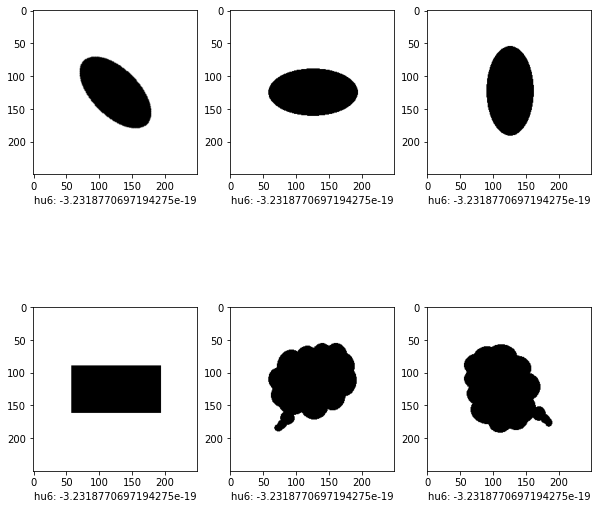

,class,hu1,hu2,hu3,hu4,hu5,hu6,hu7
0,Oval_45,0.000756,8.495456e-04,1.530792e-16,1.282563e-15,-1.346697e-23,-3.231877e-19,4.530556e-31
1,Oval_H,0.000755,-2.905781e-07,1.169891e-15,8.244610e-17,-1.902685e-24,-3.364399e-21,-2.523028e-32
2,Oval_V,0.000755,6.515322e-07,1.169891e-15,8.244610e-17,3.755687e-24,-3.364399e-21,-2.523028e-32
3,Rectangular_H,0.000790,1.973790e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,Shape_0,0.000667,-3.029845e-04,5.695543e-12,6.458224e-13,1.644139e-18,4.067655e-17,-5.026778e-26
5,Shape_90,0.000667,3.029952e-04,5.695543e-12,6.458224e-13,-4.735591e-19,4.067655e-17,-5.026778e-26


In [3]:
img_path = "Test images/"

features = []
i=0
for f in os.listdir(img_path):
    i+=1
    fpath = img_path + f
    sample = f.replace(".png", "")
    img = cv.imread(fpath, cv.IMREAD_GRAYSCALE)
    img_ = cv.bitwise_not(img)
    hu_m = hu(img_)
    hu_m = np.array(hu_m)
    hu_m = [sample] + hu_m.reshape((1, 7)).tolist()[0]
    features.append(hu_m)
    fig   = plt.figure(1, figsize=(10,10))
    plt.subplot(2,3,i)
    plt.imshow(img, cmap="gray")
    plt.xlabel('hu6: {}'.format(features[0][6]))
plt.show()
cols = ["class", "hu1", "hu2", "hu3", "hu4", "hu5", "hu6", "hu7"]
df = pd.DataFrame(features, columns=cols)
df
